Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [105]:
!rm -rf '/content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented_train'

In [195]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
%matplotlib inline
import io
import zipfile
import glob

In [92]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [98]:
## Referencing data to my drive and then reading it from my drive

zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/cnn_data/CNN_assignment.zip", 'r')
zip_ref.extractall("")  # extracts to /content folder
zip_ref.close()

In [196]:
path_to_train_directory  = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
path_to_test_directory   = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [197]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')


In [198]:
data_dir_train

PosixPath('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [199]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [29]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [108]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_train_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # Resizing jere only
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    #crop_to_aspect_ratio=False,
    
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [32]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_train_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width), # Resizing jere only
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
#     crop_to_aspect_ratio=False,
    
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [33]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

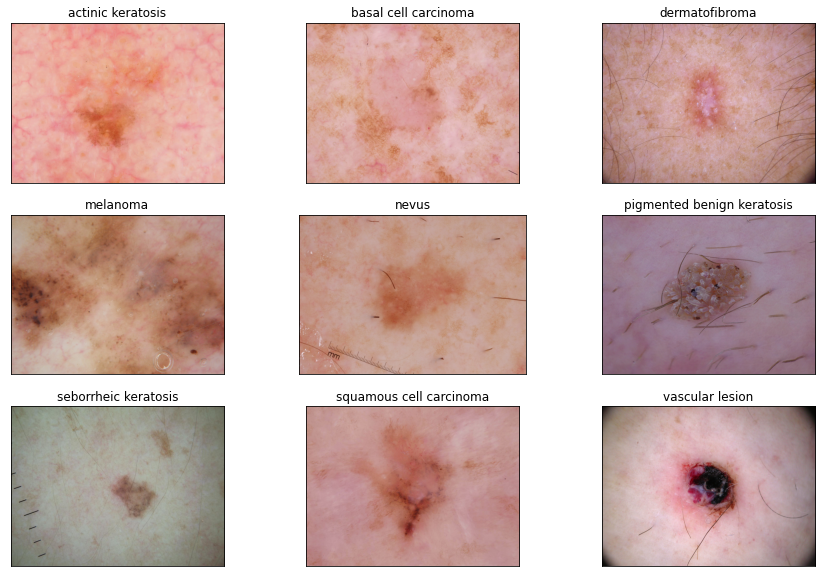

In [34]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

fig = plt.figure(figsize=(15,10))
forget_lst = []
for ind,i in enumerate(class_names):
    ax = fig.add_subplot(3, 3, 1 + ind, xticks=[], yticks=[])
    ax.set_title(i)
    image_lst = os.listdir(path_to_train_directory+i)
    im = PIL.Image.open(path_to_train_directory+i+"/"+image_lst[0])
    plt.imshow(im)
plt.show()
    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [36]:
### Your code goes here

# I am using scaling in network itself not here

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(
    scale = 1.0/255, offset=0.0,)

In [37]:
# normalized_train__ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# normalized_val__ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [38]:
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [57]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),  ## Added Rescaling layer to normalize data
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [58]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [59]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 303ms/step - loss: 2.0674 - accuracy: 0.1752 - val_loss: 2.0960 - val_accuracy: 0.2282
Epoch 2/20
56/56 [==============================] - 12s 213ms/step - loss: 1.9090 - accuracy: 0.2640 - val_loss: 1.8010 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 12s 213ms/step - loss: 1.8031 - accuracy: 0.3382 - val_loss: 1.7316 - val_accuracy: 0.3468
Epoch 4/20
56/56 [==============================] - 12s 213ms/step - loss: 1.6828 - accuracy: 0.3610 - val_loss: 1.6422 - val_accuracy: 0.3714
Epoch 5/20
56/56 [==============================] - 12s 213ms/step - loss: 1.6539 - accuracy: 0.3929 - val_loss: 1.5928 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 12s 213ms/step - loss: 1.6133 - accuracy: 0.4113 - val_loss: 1.5733 - val_accuracy: 0.4362
Epoch 7/20
56/56 [==============================] - 12s 213ms/step - loss: 1.5907 - accuracy: 0.4196 - val_loss: 1.5575 - val_accuracy: 0.4676

In [60]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 256)     7168      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 512)       1180160   
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 43, 43, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 1024)     

### Visualizing training results

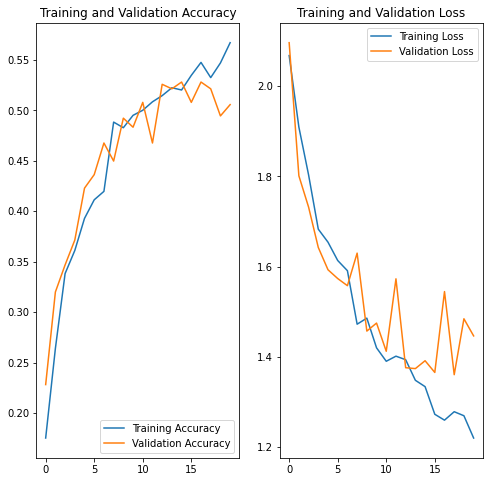

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

# Findings
1. Model is a littile overfit(around 5 to 6 %)
2. Accuracy is not moving more than 55 percent
3. There is a deficiency of data
4. Our model needs more data to learn
5. Found 2239 files belonging to 9 classes.
6. 1792(80%) files for training and 497 for validation(20%).
9. Data Resclaed to 180*180 in network first layer
7. Optimizer used : adam
8. loss function : SparseCategoricalCrossentropy
9. training epoch 20
7. We will go with zoom startegy as some information may reappear when we zoom
8. We will add five more data points for every image


# Data Augmentation 

In [76]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [112]:
src_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
des_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented_train'

In [113]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

from keras.preprocessing.image import ImageDataGenerator
#Construct Data Generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        # rotation_range=10,
                        # width_shift_range=0.1,
                        # height_shift_range=0.1,
                        zoom_range=.2,
                        # horizontal_flip=True)
                                    )

In [ ]:
for class_name in os.listdir(src_path):
  for img in os.listdir(src_path+'/'+class_name):

    image = load_img(src_path+'/'+class_name+'/'+img)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    if( class_name not in os.listdir(des_path)):
      temp = des_path+'/'+class_name
      os.makedirs(temp)
    imageGen = data_generator.flow(image, batch_size=1, save_to_dir=des_path+'/'+class_name,save_prefix="image", save_format="jpg")
    total_image = 5
    i = 0
    for e in imageGen:
        if (i == total_image):
            break
        i = i +1
    
  

In [125]:
path_to_train_directory  = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented_train/'
path_to_test_directory   = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

In [119]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/augmented_train/")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [120]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

12168
118


In [121]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_train_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    #crop_to_aspect_ratio=False,
    
)

Found 12168 files belonging to 9 classes.
Using 9735 files for training.


In [122]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_train_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
#     crop_to_aspect_ratio=False,
    
)

Found 12168 files belonging to 9 classes.
Using 2433 files for validation.


1. We are using max zoom 20 % for data augmentation
2. We have created around 5 data points for each image 
3. Stored in new folder
4. After augmentation we have 12168 data points

In [123]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the augmented data

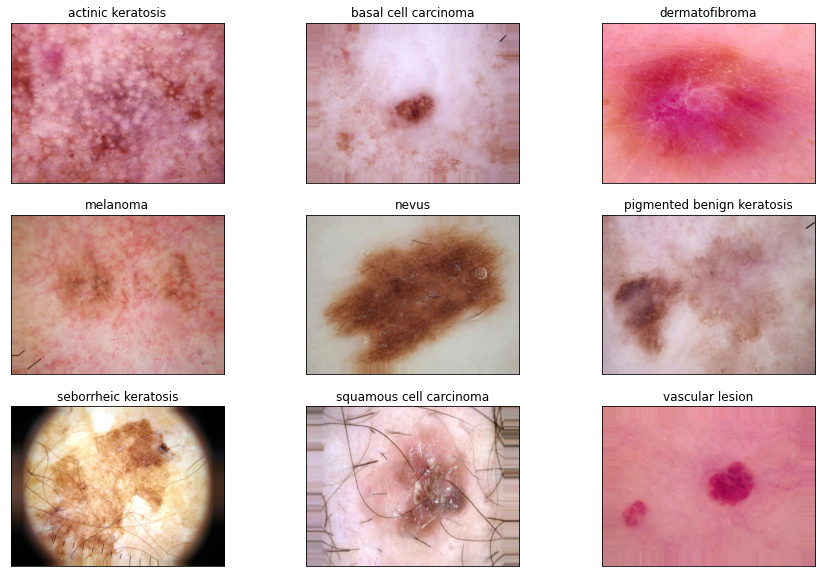

In [126]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

fig = plt.figure(figsize=(15,10))
forget_lst = []
for ind,i in enumerate(class_names):
    ax = fig.add_subplot(3, 3, 1 + ind, xticks=[], yticks=[])
    ax.set_title(i)
    image_lst = os.listdir(path_to_train_directory+i)
    im = PIL.Image.open(path_to_train_directory+i+"/"+image_lst[0])
    plt.imshow(im)
plt.show()
    

In [127]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Todo:

In [129]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



### Compiling the model

In [130]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [131]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
305/305 [==============================] - 52s 82ms/step - loss: 1.6935 - accuracy: 0.3660 - val_loss: 1.4007 - val_accuracy: 0.4977
Epoch 2/20
305/305 [==============================] - 19s 62ms/step - loss: 1.3810 - accuracy: 0.5034 - val_loss: 1.3281 - val_accuracy: 0.5261
Epoch 3/20
305/305 [==============================] - 19s 61ms/step - loss: 1.2976 - accuracy: 0.5300 - val_loss: 1.2432 - val_accuracy: 0.5590
Epoch 4/20
305/305 [==============================] - 19s 61ms/step - loss: 1.2353 - accuracy: 0.5543 - val_loss: 1.1948 - val_accuracy: 0.5647
Epoch 5/20
305/305 [==============================] - 19s 61ms/step - loss: 1.1570 - accuracy: 0.5807 - val_loss: 1.1424 - val_accuracy: 0.5767
Epoch 6/20
305/305 [==============================] - 19s 61ms/step - loss: 1.1035 - accuracy: 0.5929 - val_loss: 1.1268 - val_accuracy: 0.5828
Epoch 7/20
305/305 [==============================] - 19s 61ms/step - loss: 1.0319 - accuracy: 0.6184 - val_loss: 1.0251 - val_accuracy:

### Visualizing the results

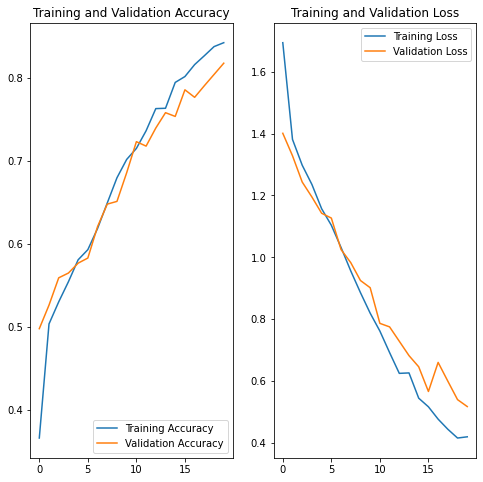

In [132]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# Findings after Augmentation data
1. Improved train accuracy from 55 to 84%
2. Improved validation accuracy from 50 to 81%
3. Improved overfitting from 6 to 3 percent
3. We also added dropout .2 in initial layers and .1 in later layers to reduce overfitting
4. Little bit of overfitting is there but manageable
5. Rescaling is used in first layer of network
6. training epoch 20
5. Augmented data is 12168 out of which Train data 9735(80%)
6. Validation data 2433(20%)
7. Optimizer used : adam
8. loss function : SparseCategoricalCrossentropy

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [134]:
## Your code goes here.
class_balance_dict ={}
for ind,i in enumerate(class_names):
    image_lst = os.listdir("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"+i)
    class_balance_dict[i] = len(image_lst)
class_balance_dict

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

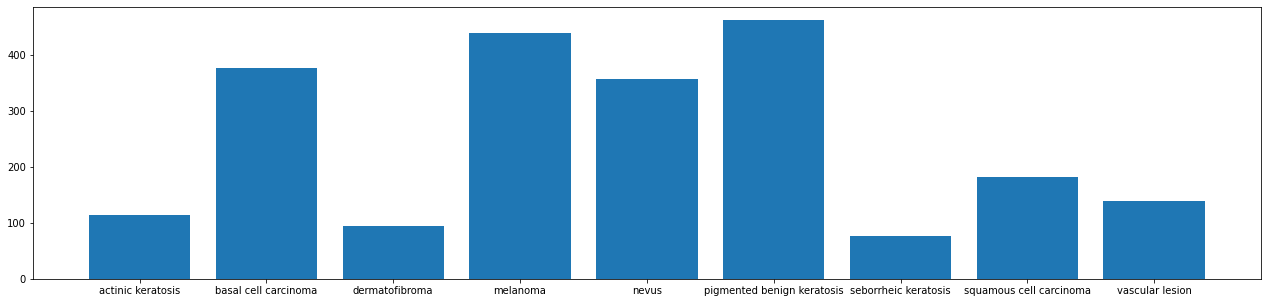

In [138]:
plt.figure(figsize=(22,5))
plt.bar(range(len(class_balance_dict)), list(class_balance_dict.values()), align='center')
plt.xticks(range(len(class_balance_dict)), list(class_balance_dict.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


# Findings
1. "seborrheic keratosis" have least no of samples 77
2. "pigmented benign keratosis" classes dominate the data in terms proportionate number of samples 462
3. Classes are imbalanced so we need to increase number of samples to make them appropriatly balanced

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [139]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [143]:
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')
path_to_train_directory  = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
path_to_test_directory   = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

In [141]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # First, we add a horizontal flip operation to the pipeline:
    p.flip_left_right(probability=0.4)

    # Now we add a vertical flip operation to the pipeline:
    p.flip_top_bottom(probability=0.8)

    # Add a rotate90 operation to the pipeline:
    p.rotate90(probability=0.1)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE304B7990>: 100%|██████████| 500/500 [00:16<00:00, 30.22 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE304887D0>: 100%|██████████| 500/500 [00:15<00:00, 31.67 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE4A2D93D0>: 100%|██████████| 500/500 [00:15<00:00, 31.61 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBE2F75FBD0>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FBE4A16BCD0>: 100%|██████████| 500/500 [01:34<00:00,  5.31 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBEC7FEDE50>: 100%|██████████| 500/500 [00:16<00:00, 30.77 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBE4A24D750>: 100%|██████████| 500/500 [00:39<00:00, 12.66 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE4A07B5D0>: 100%|██████████| 500/500 [00:15<00:00, 31.68 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE4A0FAF50>: 100%|██████████| 500/500 [00:15<00:00, 31.87 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [170]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [171]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:10]  # Because list is very big


['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024909.jpg_364a08bf-0704-4915-9868-ae3240498f42.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026072.jpg_ab0976b1-a33a-4312-aa51-2df5c832ddd8.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027018.jpg_f28178fc-55e4-4f43-8d77-421f3d321404.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026277.jpg_f11b5338-9b97-4d09-a8f7-b446c401efcc.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026947.jp

In [172]:
import glob
path_list_old = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_old[:10]

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0025388.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0028656.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0026769.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0025777.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0024851.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0027435.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0025286.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0025485.jpg',


In [173]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
set(lesion_list_new)  # Because list was very big to show 

{'actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion'}

In [174]:
 lesion_list_old = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*', '*','*.jpg'))]
set(lesion_list_old)  # Because list was very big to show 

{'actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion'}

In [176]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
len(dataframe_dict_new)

4500

In [178]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))
len(dataframe_dict_old)

2239

In [179]:
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])

In [180]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [181]:
new_df['Label'].value_counts()

pigmented benign keratosis    1000
basal cell carcinoma          1000
seborrheic keratosis          1000
dermatofibroma                1000
squamous cell carcinoma        739
vascular lesion                500
actinic keratosis              500
melanoma                       500
nevus                          500
Name: Label, dtype: int64

In [182]:
new_df.shape

(6739, 2)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [183]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [188]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [189]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [190]:
## your code goes here

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [191]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [192]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 27s 151ms/step - loss: 2.0830 - accuracy: 0.1834 - val_loss: 1.8524 - val_accuracy: 0.2442
Epoch 2/50
169/169 [==============================] - 25s 144ms/step - loss: 1.7190 - accuracy: 0.3309 - val_loss: 1.5701 - val_accuracy: 0.4098
Epoch 3/50
169/169 [==============================] - 25s 144ms/step - loss: 1.5737 - accuracy: 0.3922 - val_loss: 1.5022 - val_accuracy: 0.4187
Epoch 4/50
169/169 [==============================] - 25s 144ms/step - loss: 1.4961 - accuracy: 0.4152 - val_loss: 1.4369 - val_accuracy: 0.4395
Epoch 5/50
169/169 [==============================] - 25s 144ms/step - loss: 1.4301 - accuracy: 0.4336 - val_loss: 1.4041 - val_accuracy: 0.4521
Epoch 6/50
169/169 [==============================] - 25s 145ms/step - loss: 1.4071 - accuracy: 0.4445 - val_loss: 1.3934 - val_accuracy: 0.4521
Epoch 7/50
169/169 [==============================] - 25s 145ms/step - loss: 1.3759 - accuracy: 0.4649 - val_loss: 1.3441 - val_ac

#### **Todo:**  Visualize the model results

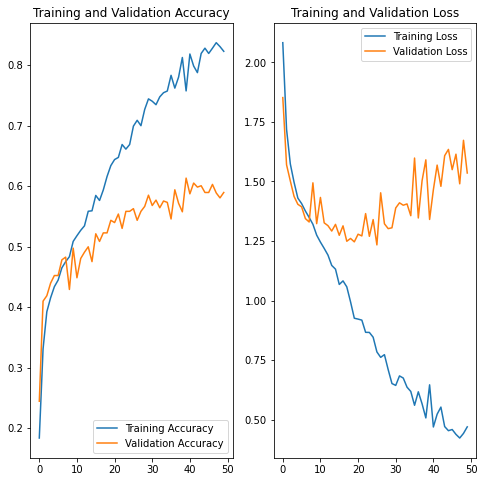

In [194]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# Analysis :
1. Lots of imbalance in data classes
1. Used two augmentation methods one using **keras augmentor** and other usinging **Augmentor package**
3. Rescaled, resized
2. Augmented 12000 data using **20 % zoom** only and got **84%** traind and **81 %** validation accuracy.
3. Augmented on **6739(2239+4500)** data using **rotation , flip** and got **82%** traind and **59 %** validation accuracy.
4. That means **at least we need 10k(10000)** data to get a respected accuracy)
6. **Zoom augmentation seems to work better than others**
5. We should have used dropouts in better way
7. After 60% validation accurcy did not improve on 6739 data but train accuracy shoots up to 82% that makes model higly overfitted.
8. We need more data to balance it and more **dropouts may be 50% on initial layers**. **bold text** **bold text**
9. Rescaling is necessory to make your code run faster 
10. **We can get 60% validation accuracy if we use less than 10k data and as we move from 10k to more we can improve drastically**.
11. **If we use some pretrained cnn models like vvg-net, inception we can get better accuracies on small data also**

